## An Introduction to Linear Regression with Applications to AI

### Motivation for Linear Regression
- Linear regression allows us to investigate the relationship between two or more variables statistically
- Basic introduction to supervised learning
- Can be thought of as a building block of artificial neural networks (Perceptrons)

### Learning Objectives

Upon successful completion of this session, you should be able to:
-   Fit a Simple Linear Regression model to data and interpret model coefficients
-   Build and train a neural network (one layer perceptron) to solve a regression problem, as an introduction to the concept of Artificial Neural Networks (ANNs)
-   Build and train a deep neural network using Keras -- a high-level, user-friendly API for building and training deep learning models. 

### Simple Linear Regression: A Statistical Approach

#### Model definition

We start by defining a simple linear regression (SLR) statistical model: 
The goal of a SLR model is to investigate the relationship between the **response** and the **predictor** variables. 

Recall -- from high school algebra -- that the equation of a line describing a linear relation between $x$ and $y$ has the following algebraic form:

$y = b + mx$

where $m$ is the slope and $b$ is the y-intercept.

The general form of the SLR model -- for predicting a quantitative response (dependent) $Y$ on the basis of a single predictor (independent) variable $X$ -- closely resembles the equation of a line shown above, such that:

$Y = \beta_0 + \beta_1 X + \epsilon$

For an individual observation ($x_i, y_i$), the regression equation becomes:

$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$

Where:
-   $\beta_0$ is the is the population y-intercept,
-   $\beta_1$ is the population slope,
-   $x_i$ is the *i*th (predictor/independent) observation, and
-   $\epsilon_i$ is the error or deviation of observation $y_i$ from the line $\beta_0 + \beta_1 x_i$,
-   and $\epsilon \sim N (0, \sigma^2)$

Together, $\beta_0$ and $\beta_1$ are known as the (unknown) population model ***coefficients*** or ***parameters***.

We use training data (or random sample) to produce estimates of the parameters -- $\hat\beta_0$ and $\hat\beta_1$ to describe the relation between $Y$ and $X$, **and make predictions of $\hat{y_i}$ given $x_i$**. Estimation is typically by the method of Ordinary Least Squares (OLS). 

#### Errors (Loss)

The predicted (fitted) value of $Y$ ($\hat{y_i}$) based on the *i*th value of $X$ ($\hat{x_i}$) is obtained by:

$fit_i=\hat{y_i} = \hat\beta_0 + \hat\beta_1 x_i$

Then

$res_i=\epsilon_i = y_i - \hat{y_i}$

represents the *i*th residual -- this is the difference between the *i*th observed response value and the *i*th response value that is predicted by our linear model.

Loss is a measure of the difference between the actual values and our predictions. This difference is defined by Residual sum of squares (RSS) :

$RSS=\sum_{i=1}^{n}(y_i - \hat{y_i}){^2}$

With linear regression, it's common to use mean squared error (MSE), calculated using the formula:


$MSE  = \frac{1}{n}\sum_{i=1}^{n} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$

Least square estimates of $\beta_0$ and $\beta_1$ are values of intercept and slope that minimize MSE.

#### Model assumptions for simple linear regression

In an ideal SLR model, we obtain sub-populations of responses, one for each value of the explanatory/predictor variable.

The regression of the response variable $Y$ on the explanatory variable $X$ is a mathematical relationship between the **means** of these sub-populations and the explanatory variable.

The simple linear regression model specifies that this relationship is a straight line function of the explanatory variable.

The following model assumptions must hold to warrant fitting a SLR model to data:

1.  **Normality**: there is a normally distributed sub-population of responses for each value of the explanatory variable.

2.  **Linearity**: the means of the sub-populations fall on a straight line function of the explanatory variable.

3.  **Constant variance**: the sub-population standard deviations are all equal (to $\sigma$).

4.  **Independence**: the selection of an observation from any of the sub-populations is independent of the selection of any other observation. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd
import seaborn as sns

#### Is there a statistically significant relationship between height and weight?
Suppose we took a ***random*** sample from students at a large university and asked them about their **height** and **weight**. We want to determine and quantify the relationship between height and weight. The dataset can be found [here](https://online.stat.psu.edu/stat500/sites/stat500/files/data/university_ht_wt.TXT). 

In [6]:
#Load data from file
university_ht_wt = pd.read_csv('data/university_ht_wt.csv')   # read in the data file
university_ht_wt.head() 

,height,weight
0,72.0,200.0
1,68.0,165.0
2,69.0,160.0
3,68.0,135.0
4,64.0,120.0


In [7]:
university_ht_wt.count()

height    30
weight    28
dtype: int64

In [8]:
#drop rows with empty values of weight
#university_ht_wt['weight'].replace('', np.nan, inplace=True) #deprecated
university_ht_wt['weight'].replace('', np.nan)
university_ht_wt.dropna(subset=['weight'], inplace=True)
university_ht_wt.count()

height    28
weight    28
dtype: int64

When applying a statistical model, check that model assumptions are met

<Axes: xlabel='height', ylabel='weight'>

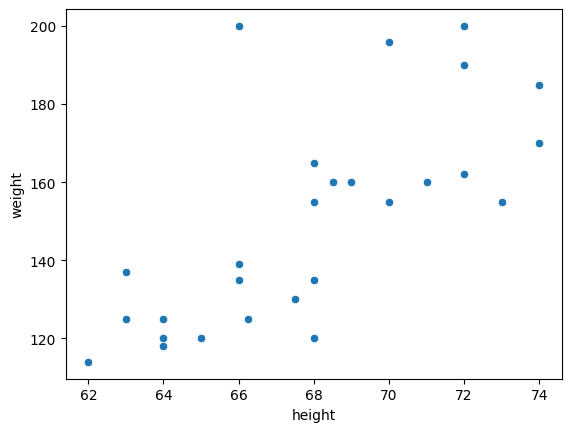

In [9]:
sns.scatterplot(data=university_ht_wt, x="height", y="weight")

We fit a SLR model -- we estimate parameters that minimize errors

In [10]:
#fit a SLR model to data 
fit = smf.ols('weight ~ height', data=university_ht_wt).fit()

#Obtain predcicted (fits) values; and residuals (errors)
university_ht_wt['predicted_wt'] = fit.predict(university_ht_wt['height'])
university_ht_wt['residuals'] = fit.resid
university_ht_wt.head()

,height,weight,predicted_wt,residuals
0,72.0,200.0,172.671250,27.328750
1,68.0,165.0,150.718434,14.281566
2,69.0,160.0,156.206638,3.793362
3,68.0,135.0,150.718434,-15.718434
4,64.0,120.0,128.765618,-8.765618


#### Research Question: Is height a significant linear predictor of weight?

The regression model that describes the relationship between $weight$ and $height$ variables is:

$weight = \beta_0 + \beta_1 \cdot height + \epsilon$

The hypotheses we are testing are:

$H_0: \beta_1 = 0$

$H_A: \beta_1 \neq 0$

We compute a *t-statistic*, given by

$t = \frac{\hat{\beta_1} - 0} {SE(\hat{\beta_1)}}$

which measures the number of standard deviations that $\hat\beta_1$ is away from 0.

If there really is no relationship between $X$ and $Y$ , then we expect that the *t-statistic* will have a *t*-distribution with *n*−2 degrees of freedom.

The *t*-distribution has a bell shape and for values of *n* greater than approximately 30 and is quite similar to the standard normal distribution. Consequently, it is a simple matter to compute the probability of observing any number equal to *\|t\|* or larger in absolute value, assuming $\beta_1 = 0$. We call this probability the p-value. 

Roughly speaking, we interpret the p-value as follows: **a small p-value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance, in the absence of any real association between the predictor and the response.**

We obtain the model summary from the previous fit of model to the (presumably random) sample from the population:

In [11]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     26.60
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           2.22e-05
Time:                        01:17:37   Log-Likelihood:                -121.30
No. Observations:                  28   AIC:                             246.6
Df Residuals:                      26   BIC:                             249.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -222.4794     72.421     -3.072      0.0

The regression equation for this fit becomes: 

**$weight = -222.48 + 5.49 *height$**

since the slope ($\beta_1$) is 5.49, the intercept ($\beta_0$) is -222.

The test for the slope has a p-value of less than 0.001. Therefore, with a significance level of 5% (and even as low as 0.1%), we can conclude that there is enough evidence to suggest that height is a significant linear predictor of weight.

Differently stated, **an increase of one inch in height is associated with -- on average -- an increase of 5.488 lbs in weight.**

Does $\beta_0$ have a meaningful interpretation?

The intercept is -222. Therefore, when height is equal to 0 (an unlikely scenario), then a person's weight is predicted to be -222 pounds. It is also not possible for someone to have a height of 0 inches or weight of -222 pounds. Therefore, the intercept does not have a valid meaning.

##### What's the (95%?) confidence interval for the population slope?

A 95% confidence interval is defined as a range of values such that with 95% interval probability, the range will contain the true unknown value of the parameter.

For linear regression, the 95% confidence interval for $\beta_1$ approximately takes the form

$\hat\beta_1 \pm t_\frac{\alpha}{2} SE(\hat\beta_1)$

That is, there is approximately a 95% chance that the interval will contain the true value of $\beta_1$.

In the case of the student height-weight data, the 95% confidence interval for $\beta_1$ (and $\beta_0$) can be obtained by: 

In [12]:
fit.conf_int()

,0,1
Intercept,-371.342490,-73.616396
height,3.300904,7.675504


### Multiple Linear Regression Model
Simple linear regression is a useful approach for predicting a response
on the basis of a single predictor variable. However, in practice we
often have more than one predictor.

A multiple linear model takes the form:

$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon$

where $X_j$ represents the jth predictor and $\beta_j$ quantifies the
association between that variable and the response.

We interpret $\beta_j$ as the average effect on $Y$ of a one unit
increase in $X_j$, **holding all other predictors fixed.**

As was the case in the simple linear regression setting, the regression
coefficients $\beta_0, \beta_1, ..., \beta_p$ in the above equation are
unknown, and must be estimated.

Given estimates $\hat\beta_0, \hat\beta_1, ..., \hat\beta_p$, we can
make predictions using the formula

$\hat{y} = \hat\beta_0 + \hat\beta_1x_1 + \hat\beta_2x_2 + ... + \hat\beta_px_p$

The parameters are estimated using the same least squares approach that
we saw in the context of simple linear regression, where we choose
$\beta_0, \beta_1,...,\beta_p$ to minimize the MSE


**A tutorial on data analysis with multiple linear regression can be found [here](https://github.com/Wilber/hpcbootcamp_regression/blob/main/regression_multiple.ipynb)** 

## Regression with Perceptron
We will construct a neural network corresponding to a SLR model. We will train the network, implementing the gradient descent method. 


### Model definition 
We will start to use notation commonly used in machine learning, and define a SLR model as: 

$\hat{y} = wx + b,\tag{1}$

with the weigh $w$ corresponding to the slope $\beta_{1}$, and the bias $b$ corresponding to the intercept $\beta_{0}$ 


The simplest neural network model that describes the above relationship can be realized by using one **perceptron**. The **input** and **output** layers will have one **node** each ($x$ for input and $\hat{y} = z$ for output):

<img src="images/nn_model_linear_regression_simple.png" style="width:400px;">

**Weight** ($w$) and **bias** ($b$) are the parameters that will get updated when you **train** the model. They are initialized to some random values or set to 0 and updated as the training progresses.

**Weighted sum ($Z$)** is the weighted sum of the linear combinations of inputs, weights and bias, **before** the activation function is applied. We are not applying an activation function in this example, hence $Z$ is an estimate of $\hat{y}$.

For each training example ($x_i, y_i$), the prediction $\hat{y_i}$ can be calculated as:


$z_i =  w x_i + b,$

$\hat{y_i}  =  z_i,$


where $i = 1, \dots, m$.

We can organise all training examples as a vector $X$ of size ($1 \times m$) and perform scalar multiplication of $X$ ($1 \times m$) by a scalar $w$, adding $b$, which will be broadcasted to a vector of size ($1 \times m$):


$Z   = w X + b,$

$\hat{Y} = Z,$


This set of calculations is called **forward propagation**.

Given the estimate $\hat{Y}$, we can now measure the difference between the actual $y_i$ and the estimated $\hat{y_i}$ to obtain the errors (recall residuals) for each training example with the **loss function**: 

$L\left(w, b\right)  = \frac{1}{2}\left(\hat{y_i} - y_i\right)^2$


To compare the resulting vector of the predictions $\hat{Y}$ ($1 \times m$) with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y_i} - y_i\right)^2$

This function is called the sum of squares **cost function**. The aim is to optimize the cost function during the training, which will minimize the differences between original values $y_i$ and predicted values $\hat{y_i}$.

When your weights were just initialized with some random values, and no training was done yet, you can't expect good results. You need to calculate the adjustments for the weight and bias, minimizing the cost function. This process is called **backward propagation**. 

The method we will use to minimize the cost function is **gradient descent**, and we will attempt to identify parameter values that minimize the cost function by taking partial derivatives of the cost function. 

<img src="images/gradient_descent.png" style="width:500px;">

We calculate partial derivatives as:


$\frac{\partial \mathcal{L} }{ \partial w } = \frac{1}{m}\sum_{i=1}^{m} \left(\hat{y_i} - y_i\right)x_i,$


$\frac{\partial \mathcal{L} }{ \partial b } = \frac{1}{m}\sum_{i=1}^{m} \left(\hat{y_i} - y_i\right)$

We then update the parameters iteratively using the expressions:


$w = w - \alpha \frac{\partial \mathcal{L} }{ \partial w },$

$b = b - \alpha \frac{\partial \mathcal{L} }{ \partial b },$

where $\alpha$ is the learning rate. Then repeat the process until the cost function stops decreasing.

The general **methodology** to build a neural network is to:
1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation (calculate the perceptron output),
    - Implement backward propagation (to get the required corrections for the parameters),
    - Update parameters.
4. Make predictions.


### A Neural Network Model for Linear Regression

#### Define the Neural Network Structure

We will use a [Kaggle dataset](https://www.kaggle.com/code/devzohaib/simple-linear-regression/notebook) (saved in a file `data/tvmarketing.csv`), to determine if there a relationship between `TV` advertising budget and the product `Sales`.

In [13]:
np.random.seed(3)

path = "data/tvmarketing.csv"

adv = pd.read_csv(path)

adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


And add plot

<Axes: xlabel='TV', ylabel='Sales'>

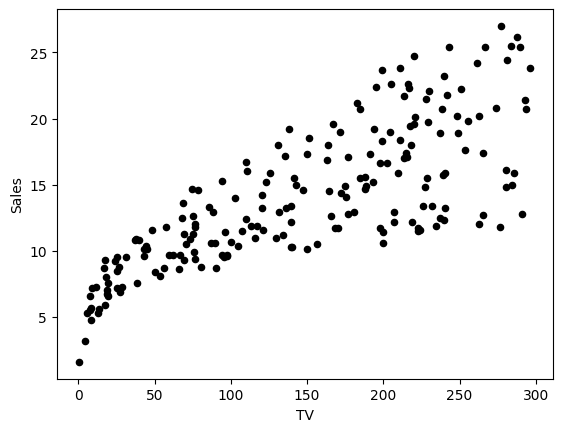

In [14]:
adv.plot(x='TV', y='Sales', kind='scatter', c='black')

The fields `TV` and `Sales` have different units. To make gradient descent algorithm efficient, you needed to normalize each of them: subtract the mean value of the array from each of the elements in the array and divide them by the standard deviation.

Column-wise normalization of the dataset can be done for all of the fields at once and is implemented in the following code:

In [15]:
adv_norm = (adv - np.mean(adv, axis = 0))/np.std(adv, axis = 0)

adv_norm.head()

,TV,Sales
0,0.969852,1.552053
1,-1.197376,-0.696046
2,-1.516155,-0.907406
3,0.052050,0.860330
4,0.394182,-0.215683


<Axes: xlabel='TV', ylabel='Sales'>

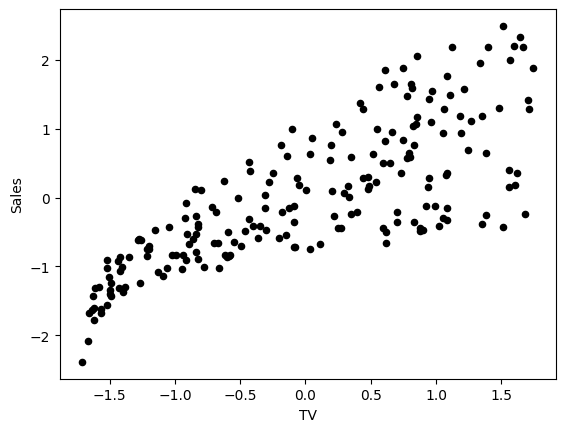

In [16]:
adv_norm.plot(x='TV', y='Sales', kind='scatter', c='black')

Create row vectors `X_norm` and `Y_norm`: 

In [17]:
X_norm = adv_norm['TV']
Y_norm = adv_norm['Sales']

X_norm = np.array(X_norm).reshape((1, len(X_norm)))
Y_norm = np.array(Y_norm).reshape((1, len(Y_norm)))

print ('The shape of X_norm: ' + str(X_norm.shape))
print ('The shape of Y_norm: ' + str(Y_norm.shape))
print ('I have m = %d training examples!' % (X_norm.shape[1]))

The shape of X_norm: (1, 200)
The shape of Y_norm: (1, 200)
I have m = 200 training examples!


#### Define two variables for the neural net structure:
- `n_x`: the size of the input layer
- `n_y`: the size of the output layer

using shapes of arrays `X` and `Y`.

In [18]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    return (n_x, n_y)

(n_x, n_y) = layer_sizes(X_norm, Y_norm)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1


#### Initialize model parameters

Implement the function `initialize_parameters()`, initializing the weights array of shape $(n_y \times n_x) = (1 \times 1)$ with random values and the bias vector of shape $(n_y \times 1) = (1 \times 1)$ with zeros.

In [19]:
def initialize_parameters(n_x, n_y):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias value set as a vector of shape (n_y, 1)
    """
        
    W = np.random.randn(n_y, n_x) * 0.01
    
    
    b = np.zeros((n_y, 1))
    
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[0.01788628]]
b = [[0.]]


#### The loop!
**Implement `forward_propagation()` (calculate the perceptron output) using the following the equation:**

$Z =  w X + b,$

$\hat{Y} = Z$


In [20]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    Y_hat -- The output
    """
    W = parameters["W"]
    b = parameters["b"]
    
    # Forward Propagation to calculate Z.
    Z = np.matmul(W, X) + b  #matrix multiplication of numpy arrays, plus bias, to obtain weighten sums! 
    Y_hat = Z

    return Y_hat

Y_hat = forward_propagation(X_norm, parameters)

print("Some elements of output vector Y_hat:", Y_hat[0, 0:5])

Some elements of output vector Y_hat: [ 0.01734705 -0.02141661 -0.02711838  0.00093098  0.00705046]


**Quiz**: 

- What are the corresponding **Y** values? What are the errors/loss?

**Define a cost function** 

Note that our weights were just initialized with some random values, so the model has not been trained yet.

We define a cost function which will be used to train the model:

$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y_i} - y_i\right)^2$



In [21]:
def compute_cost(Y_hat, Y):
    """
    Computes the cost function as a sum of squares
    
    Arguments:
    Y_hat -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    cost -- sum of squares scaled by 1/(2*number of examples)
    
    """
    # Number of examples.
    m = Y_hat.shape[1]

    # Compute the cost function.
    cost = np.sum((Y_hat - Y)**2)/(2*m)
    
    return cost

print("cost = " + str(compute_cost(Y_hat, Y_norm)))

cost = 0.48616887080159704


**Implement `backward_propagation` function by calculating partial derivatives, as shown below:**


$\frac{\partial \mathcal{L} }{ \partial w } = \frac{1}{m}\sum_{i=1}^{m} \left(\hat{y_i} - y_i\right)x_i,$

$\frac{\partial \mathcal{L} }{ \partial b } = \frac{1}{m}\sum_{i=1}^{m} \left(\hat{y_i} - y_i\right)$ 


In [22]:
def backward_propagation(Y_hat, X, Y):
    """
    Implements the backward propagation, calculating gradients
    
    Arguments:
    Y_hat -- the output of the neural network of shape (n_y, number of examples)
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # Backward propagation: calculate partial derivatives denoted as dW, db for simplicity. 
    dZ = Y_hat - Y
    dW = 1/m * np.dot(dZ, X.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)
    
    grads = {"dW": dW,
             "db": db}
    
    return grads

grads = backward_propagation(Y_hat, X_norm, Y_norm)

print("dW = " + str(grads["dW"]))
print("db = " + str(grads["db"]))

dW = [[-0.76433814]]
db = [[1.687539e-16]]


**Update Parameters**: 

$w = w - \alpha \frac{\partial \mathcal{L} }{ \partial w },$

$b = b - \alpha \frac{\partial \mathcal{L} }{ \partial b }$

In [23]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule
    
    Arguments:
    parameters -- python dictionary containing parameters 
    grads -- python dictionary containing gradients 
    learning_rate -- learning rate parameter for gradient descent
    
    Returns:
    parameters -- python dictionary containing updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]
    
    # Retrieve each gradient from the dictionary "grads".
    dW = grads["dW"]
    db = grads["db"]
    
    # Update rule for each parameter.
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

parameters_updated = update_parameters(parameters, grads)

print("W updated = " + str(parameters_updated["W"]))
print("b updated = " + str(parameters_updated["b"]))

W updated = [[0.93509205]]
b updated = [[-2.0250468e-16]]


**Create a function `nn_model()` to integrate neural net structure (shape), parameter initialization, and the loop (iterate: foward propagation, compute cost, backward propagation, and parameter updates)** 

In [24]:
def nn_model(X, Y, num_iterations=10, learning_rate=1.2, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    learning_rate -- learning rate parameter for gradient descent
    print_cost -- if True, print the cost every iteration
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to make predictions.
    """
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    
    parameters = initialize_parameters(n_x, n_y)
    
    # Loop
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "Y_hat".
        Y_hat = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "Y_hat, Y". Outputs: "cost".
        cost = compute_cost(Y_hat, Y)
        
        # Backpropagation. Inputs: "Y_hat, X, Y". Outputs: "grads".
        grads = backward_propagation(Y_hat, X, Y)
    
        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [25]:
parameters_simple = nn_model(X_norm, Y_norm, num_iterations=50, learning_rate=0.4, print_cost=True)
print("W = " + str(parameters_simple["W"]))
print("b = " + str(parameters_simple["b"]))

W_simple = parameters["W"]
b_simple = parameters["b"]

Cost after iteration 0: 0.496595
Cost after iteration 1: 0.302974
Cost after iteration 2: 0.233271
Cost after iteration 3: 0.208177
Cost after iteration 4: 0.199144
Cost after iteration 5: 0.195892
Cost after iteration 6: 0.194721
Cost after iteration 7: 0.194300
Cost after iteration 8: 0.194148
Cost after iteration 9: 0.194093
Cost after iteration 10: 0.194074
Cost after iteration 11: 0.194066
Cost after iteration 12: 0.194064
Cost after iteration 13: 0.194063
Cost after iteration 14: 0.194063
Cost after iteration 15: 0.194063
Cost after iteration 16: 0.194062
Cost after iteration 17: 0.194062
Cost after iteration 18: 0.194062
Cost after iteration 19: 0.194062
Cost after iteration 20: 0.194062
Cost after iteration 21: 0.194062
Cost after iteration 22: 0.194062
Cost after iteration 23: 0.194062
Cost after iteration 24: 0.194062
Cost after iteration 25: 0.194062
Cost after iteration 26: 0.194062
Cost after iteration 27: 0.194062
Cost after iteration 28: 0.194062
Cost after iteration 29:

**Quiz**: 

- What happens when you increase the learning rate? 


**Predictions** 

The final model parameters can be used for making predictions, but don't forget about normalization and denormalization.

In [26]:
def predict(X, Y, parameters, X_pred):
    
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]
    
    # Use the same mean and standard deviation of the original training array X.
    if isinstance(X, pd.Series):
        X_mean = np.mean(X)
        X_std = np.std(X)
        X_pred_norm = ((X_pred - X_mean)/X_std).reshape((1, len(X_pred)))
    else:
        X_mean = np.array(np.mean(X)).reshape((len(X.axes[1]),1))
        X_std = np.array(np.std(X)).reshape((len(X.axes[1]),1))
        X_pred_norm = ((X_pred - X_mean)/X_std)
    
    
    # Make predictions.
    Y_pred_norm = np.matmul(W, X_pred_norm) + b
    # Use the same mean and standard deviation of the original training array Y.
    Y_pred = Y_pred_norm * np.std(Y) + np.mean(Y)
    
    return Y_pred[0]


X_pred = np.array([50, 120, 280])
Y_pred = predict(adv["TV"], adv["Sales"], parameters_simple, X_pred)
print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales:\n{Y_pred}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales:
[ 9.40942557 12.7369904  20.34285287]


**Visualize the fitted model on data**

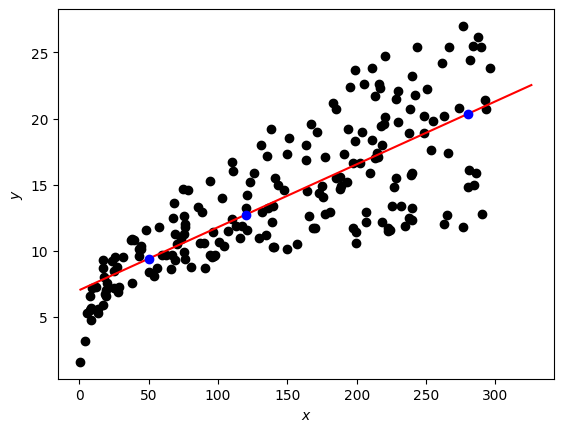

In [27]:
fig, ax = plt.subplots()
plt.scatter(adv["TV"], adv["Sales"], color="black")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(adv["TV"]),np.max(adv["TV"])*1.1, 0.1)
Y_line = predict(adv["TV"], adv["Sales"], parameters_simple, X_line)
ax.plot(X_line, Y_line, "r")
ax.plot(X_pred, Y_pred, "bo")
plt.plot()
plt.show()

### Neural Network Model with a Single Perceptron and Two Input Nodes

We can write a multiple linear regression model with two independent variables $x_1$, $x_2$ as

$\hat{y} = w_1x_1 + w_2x_2 + b = Wx + b,\tag{7}$

where $Wx$ is the dot product of the input vector $x = \begin{bmatrix} x_1 & x_2\end{bmatrix}$ and the parameters vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$, scalar parameter $b$ is the intercept. The goal of the training process is to find the "best" parameters $w_1$, $w_2$ and $b$ such that the differences between original values $y_i$ and predicted values $\hat{y}_i$ are minimum for the given training examples.




To describe the multiple regression problem, you can still use a model with one perceptron, but this time you need two input nodes, as shown in the following scheme:

<img src="images/nn_model_linear_regression_multiple.png" style="width:420px;">

The perceptron output calculation for every training example $x^{(i)} = \begin{bmatrix} x_1^{(i)} & x_2^{(i)}\end{bmatrix}$ can be written with dot product:

$z^{(i)} = w_1x_1^{(i)} + w_2x_2^{(i)} + b = Wx^{(i)} + b,\tag{8}$

where weights are in the vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$ and bias $b$ is a scalar. The output layer will have the same single node $\hat{y} = z$.

Organise all training examples in a matrix $X$ of a shape ($2 \times m$), putting $x_1^{(i)}$ and $x_2^{(i)}$ into columns. Then matrix multiplication of $W$ ($1 \times 2$) and $X$ ($2 \times m$) will give a ($1 \times m$) vector

$$WX = 
\begin{bmatrix} w_1 & w_2\end{bmatrix} 
\begin{bmatrix} 
x_1^{(1)} & x_1^{(2)} & \dots & x_1^{(m)} \\ 
x_2^{(1)} & x_2^{(2)} & \dots & x_2^{(m)} \\ \end{bmatrix}
=\begin{bmatrix} 
w_1x_1^{(1)} + w_2x_2^{(1)} & 
w_1x_1^{(2)} + w_2x_2^{(2)} & \dots & 
w_1x_1^{(m)} + w_2x_2^{(m)}\end{bmatrix}.$$

And the model can be written as


$Z =  W X + b,$

$\hat{Y} = Z $

where $b$ is broadcasted to the vector of size ($1 \times m$). These are the calculations to perform in the forward propagation step. Cost function will remain the same:

$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y_i} - y_i\right)^2$

### Let's Dive Deep! An Introduction to Deep Learning 

Deep learning is a specific subfield of machine learning that involves learning representations
from data with emphasis on learning successive layers of increasingly meaningful representations. The **deep** in **deep learning** stands for this idea of successive layers of representations. These layered representations are learned via models called neural
networks, of whom perceptrons are building blocks. 

Below is a representation of a two-layered dense neural network, with the aforementioned processes of forward and backward propagation shown. 

<img src="images/dnn.png" style="width:720px;">


#### Research question
We want to build a model that can accurately predict the median house value in California districts, given a number of features from these districts.

In [31]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Load California housing dataset
housing = fetch_california_housing()

This is a dataset of 20,640 samples, with 8 features each.
The target value is the `MedHouseVal`: Median House Value (($100k))

In [32]:
# setup dataset as data frame, for visualization
df = fetch_california_housing(as_frame=True)['frame']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Training, validation, and test datasets**


In [33]:
##Create train, validation and test sets
#training and test data
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

#split original train to train and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

**Scale and normalize the data**

In [34]:
#Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

**Building and training the model**

We define a dense model with three intermediate layers, each 64 units. The model ends with a single unit and no activation (it will be a linear layer).

The intermediate layers use a rectified linear unit (`relu`, zeroes out negative values) as their activation function.

These are the commonly used activations functions:

<img src="images/activation_functions.ppm.png" style="width:620px;">

In [35]:
#Build model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1) # Single output neuron for continuous output, no activation
])
# Compile model
model.compile(optimizer='sgd',loss='mse',metrics=['mse', 'mae'])


In [36]:
#Train (with validation at each epoch)
#Notice Verbose set to zero!
model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid), verbose=0)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,963 (35.02 KB)

 Trainable params: 8,961 (35.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

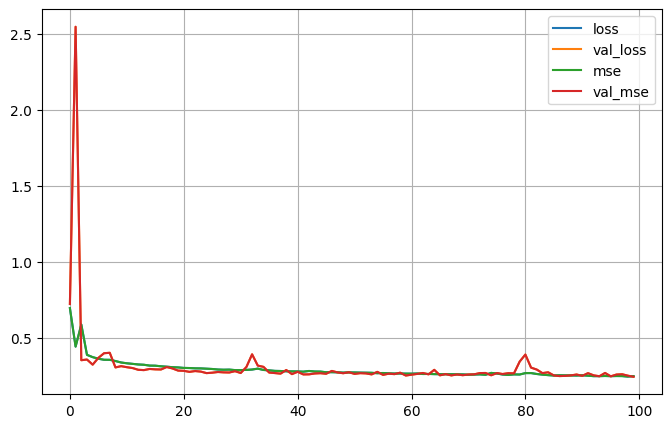

In [37]:
#Training performance
pd.DataFrame(model.history.history)[['loss','val_loss','mse','val_mse' ]].plot(figsize=(8,5))
plt.grid(True)
plt.show()


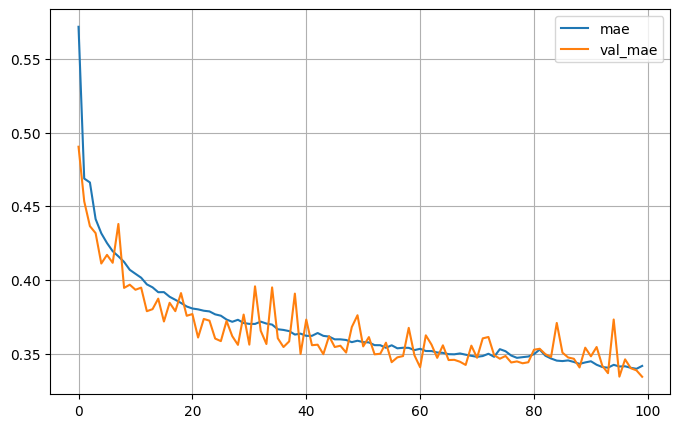

In [38]:
pd.DataFrame(model.history.history)[['mae', 'val_mae']].plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [39]:
#Generating predictions on new data
Y_pred=model.predict(X_test)
Y_pred[0]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


array([1.4870698], dtype=float32)

In [40]:
##Evaluate model: how does the model perform on unseen data? 
mse_test = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.2595 - mae: 0.3393 - mse: 0.2595


**Quiz**

- Increase number of epochs, what's the minimum loss (mse) obtained?  
- Change number of layers, and units per layer. How does this affect model accuracy? 